In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
proj = '93Nb'
trg = '65Cu'
cn = '158Yb'
bf = 1.0
ch = 'xn'
sigr = 3.0

df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')
df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.1f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb

,E_lab,E*/MeV,149Yb,150Yb,151Yb,152Yb,153Yb,154Yb,155Yb,156Yb,157Yb,158Yb
0,309.048,28.0,0.0,0.0,0.000000,0.0000,0.000,0.000,0.000000e+00,5.770000e-07,2.070000e-07,2.160000e-10
1,311.479,29.0,0.0,0.0,0.000000,0.0000,0.000,0.000,0.000000e+00,3.620000e-06,8.290000e-07,6.200000e-10
2,313.910,30.0,0.0,0.0,0.000000,0.0000,0.000,0.000,1.100000e-09,2.140000e-05,3.160000e-06,1.710000e-09
3,316.340,31.0,0.0,0.0,0.000000,0.0000,0.000,0.000,9.840000e-08,1.200000e-04,1.140000e-05,4.520000e-09
4,318.771,32.0,0.0,0.0,0.000000,0.0000,0.000,0.000,3.480000e-06,6.260000e-04,3.990000e-05,1.240000e-08
...,...,...,...,...,...,...,...,...,...,...,...,...
59,452.463,87.0,0.0,0.0,0.000154,0.0919,0.526,0.348,2.090000e-02,7.580000e-05,0.000000e+00,0.000000e+00
60,454.894,88.0,0.0,0.0,0.000251,0.0941,0.479,0.272,1.430000e-02,4.250000e-05,0.000000e+00,0.000000e+00
61,457.325,89.0,0.0,0.0,0.000389,0.0954,0.432,0.211,9.830000e-03,2.450000e-05,0.000000e+00,0.000000e+00
62,459.756,90.0,0.0,0.0,0.000576,0.0957,0.386,0.162,6.710000e-03,1.240000e-05,0.000000e+00,0.000000e+00


## Experimental values with errors

In [42]:
# Andreyev ub
# e_lab = [175.6,180,182,185.5,189.3,195,198.5,200,202.9,207,211,219,224.8,231.5,237,241.4,248.9,256.3,263.8,271.3,279.5]
# exp = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,1,1.4,3,3.5,1.7,1,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,15,35,28,25,31,16,4,1.5,0.8,np.nan], [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,35,100,300,350,370,160,150,35,56,17,9,np.nan,np.nan,np.nan], [np.nan,np.nan,100,460,850,1170,1930,1620,1950,800,320,100,20,28,np.nan,10,np.nan,np.nan,np.nan,np.nan,np.nan], [2430,9300,8250,11500,8800,4650,2600,1700,1250,350,210,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
# exp = np.array(exp)/1e3

## Scaling of the values to mb, ub or nb

In [43]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
df10 = df10_mb
df0 = df0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = mb

dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
df10.iloc[:,2:] = df10_mb.iloc[:,2:] * scale
df0.iloc[:,2:] = df0_mb.iloc[:,2:] * scale

dfm10.describe()
# exp = exp * scale

,E_lab,E*/MeV,CS
count,640.000000,640.000000,640.000000
mean,385.617234,59.500000,0.826827
std,44.938593,18.487402,2.301209
min,309.048000,28.000000,0.000000
25%,347.332500,43.750000,0.000000
50%,385.617500,59.500000,0.000002
75%,423.901750,75.250000,0.172500
max,462.186000,91.000000,13.500000


## Plotting

/tmp/ipykernel_26175/578188266.py:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
/tmp/ipykernel_26175/578188266.py:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors, alpha=0.4)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


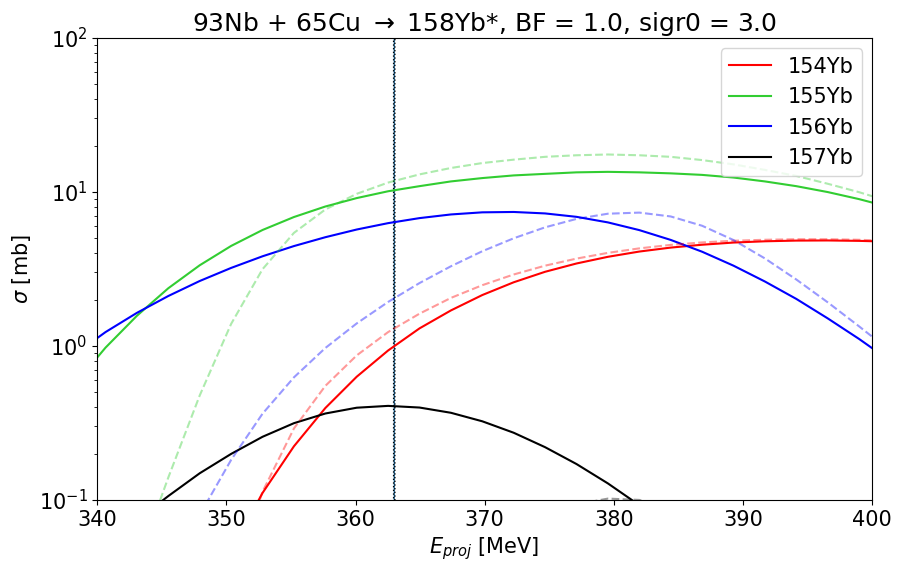

In [45]:
colors = ['red', 'limegreen', 'blue', 'black', 'gold', 'turquoise', 'magenta', 'grey', 'olive', 'brown']
sns.color_palette("dark")

plt.rcParams.update({'font.size': 15})

plot_from = 5
plot_to = 1

fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], palette=colors)
plt.semilogy()
ylow = 1e-1
yhigh = 1e2
plt.ylim(ylow, yhigh)
plt.xlim(340, 400)
plt.title(proj + ' + ' + trg + r' $\rightarrow$ ' + cn + '*, BF = ' + str(bf) + ', sigr0 = ' + str(sigr), va='top')
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[plot_from+2:-plot_to]))], linestyle='--', legend=None, palette=colors, alpha=0.4)

plt.arrow(363, ylow, 0, yhigh/ylow, linestyle=':', width=0.1)

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')

In [48]:
df10.columns[5:-1]

Index(['152Yb', '153Yb', '154Yb', '155Yb', '156Yb', '157Yb'], dtype='object')

In [49]:
df10.columns

Index(['E_lab', 'E*/MeV', '149Yb', '150Yb', '151Yb', '152Yb', '153Yb', '154Yb',
       '155Yb', '156Yb', '157Yb', '158Yb'],
      dtype='object')